
Clayton Fields
Homework 4



Problem 1:

Part a: Derive the Newton Raphson updating equation.

$f(x) = \frac{\lambda^x}{x!}\exp{\{-\lambda\}}$


Then as we have $\lambda = \alpha\beta$ and $x_i=N_i$

$L(\alpha) = \prod_{i=1} \frac{\lambda^N}{N!}\exp{\{-\alpha^T\beta\}}$

$\ell(\alpha) = n\sum_{i=1}^n\log{\{\alpha^T\beta_i\}} - log{\{N_i!\}} - \sum_{i=1}^n \alpha^T\beta_i$

$\ell'(\alpha)=  \sum_{i=1}^n \frac{N_i\beta_i}{\alpha^T\beta_i} - \sum_{i=1}^n \beta_i$

$\ell''(\alpha) = -\sum_{i=1}^n \frac{N_i\beta_i\beta_i^T}{(\alpha^T\beta_i)^2}$

Then our updating equation is:

$\alpha^{(t+1)} = \alpha^{(t)} - \big[\sum_{i=1}^n \frac{N_i\beta_i\beta_i^T}{(\alpha^{(t)T}\beta_i)^2}\big]^{-1}\cdot(\sum_{i=1}^n \frac{N_i\beta_i}{\alpha^{(t)T}\beta_i} - \sum_{i=1}^n \beta_i)$


Part b: Derive the Fisher Scoring update for finding the MLE's of $\alpha$.

$I(\alpha) = -E(\ell''(\alpha)) = -E(-\sum_{i=1}^n \frac{N_i}{\alpha^T\beta_i}\beta_i\beta^T)$

$\sum_{i=1}^n \frac{E(N_i)\beta_i\beta_i^T}{(\alpha^T\beta)^2}  = \sum_{i=1}^n \frac{(\alpha^T\beta)\beta_i\beta_i^T}{(\alpha^T\beta)^2} = $

$\sum_{i=1}^n \frac{1}{\alpha^T\beta}\beta_i\beta_i^T $

Then our updating equation is:

$\alpha^{(t+1)} = \alpha^{(t)} + \big[\sum_{i=1}^n \frac{1}{\alpha^{(t)T}\beta}\beta_i\beta_i^T\big]^{-1}\cdot(\sum_{i=1}^n \frac{N_i\beta_i}{\alpha^{(t)T}\beta_i} - \sum_{i=1}^n \beta_i)$

In [57]:
##Part c: Implement the methods

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Feb  8 12:54:44 2020

@author: claytonfields
"""

import numpy as np
import pandas as pd
from scipy.linalg import inv
import math
import matplotlib.pyplot as plt

def l(alpha,beta,N):
    n = N.size
    temp = []
    retval = np.zeros((alpha.size,1))
    for i in range(n):
        b_i = beta[i].reshape(alpha.size,1)
        N_i = N[i]
        foo = np.asscalar(alpha.T.dot(beta[i]))
        temp.append(N_i*np.log(foo) - np.log(math.factorial(N_i)) - foo)
    for x in temp:
        retval +=x
    return retval
    

def lprime(alpha, beta, N):
    n = N.size
    temp = []
    retval = np.zeros((2,1))
    for i in range(n):
        b_i = beta[i].reshape(2,1)
        N_i = N[i]
        foo = np.asscalar(alpha.T.dot(beta[i]))
        temp.append(N[i]*b_i*(1/foo) - b_i)
    for x in temp:
        retval +=x
    return retval

def l2prime(alpha, beta, N):
    n = N.size
    temp = []
    retval = np.zeros((2,2))
    for i in range(n):
        b_i = beta[i].reshape(2,1)
        N_i = np.asscalar(N[i])
        foo = np.asscalar((alpha.T.dot(b_i))**2)
        temp.append(-(N_i/foo)*np.outer(b_i,b_i.T))
    for x in temp:
        retval+=x
    return retval

def fisher(alpha, beta, N):
    n = N.size
    temp = []
    retval = np.zeros((2,2))
    for i in range(n):
        b_i = beta[i].reshape(-1,1)
        foo = np.asscalar(np.dot(alpha.T,b_i))
        temp.append((1/foo)*np.outer(b_i,b_i.T))
    for x in temp:
        retval+=x
    return retval
    
    
data = pd.read_csv('oilspills.dat' ,sep = " ")


b1 = data['importexport'].to_numpy().reshape(26,1)
b2 = data['domestic'].to_numpy().reshape(26,1)
N = data['spills'].to_numpy().reshape(26,1)
beta = np.hstack((b1,b2))



In [59]:

##Newton's Method
ls = []
t = 0
maxt = 10
alpha = np.array([.1,.1]).reshape(2,1)
newta = [alpha[0]]
newtb = [alpha[1]]
print('Newton\'s method')
for i in range(maxt):
    alpha = alpha - inv(l2prime(alpha, beta, N)).dot(lprime(alpha,beta,N))
    newta.append(alpha[0])
    newtb.append(alpha[1])
    ls.append([t,alpha,inv(l2prime(alpha, beta, N))])
    t+=1
print()
#plt.plot(newta,newtb)

#Print Table
print("Table for MLE using Newton's Method")
df = pd.DataFrame(ls[2:7], columns = ['Iteration,t','alpha^\(t)','[M^(t)]^-1'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Newton's method

Table for MLE using Newton's Method


"Iteration,t",alpha^\(t),[M^(t)]^-1
2,[[0.58673712] [0.55863388]],[[-0.04542835 0.05113135] [ 0.05113135 -0.09622699]]
3,[[0.86005387] [0.78584383]],[[-0.09590347 0.10725054] [ 0.10725054 -0.19971389]]
4,[[1.04619772] [0.91413586]],[[-0.13928706 0.15470443] [ 0.15470443 -0.28483615]]
5,[[1.09483059] [0.93714589]],[[-0.15125971 0.16748217] [ 0.16748217 -0.30677972]]
6,[[1.09714789] [0.93755549]],[[-0.15179728 0.16803515] [ 0.16803515 -0.30766415]]


In [61]:
##Fisher Scoring
t = 0
maxt = 10
alpha = np.array([.1,1]).reshape(2,1)
fisha = [alpha[0]]
fishb = [alpha[1]]
ls = []

print('Fisher Scoring Method')
for i in range(maxt):   
    alpha = alpha + inv(fisher(alpha, beta, N)).dot(lprime(alpha,beta,N))
    stderr = np.sqrt(np.diag(inv(fisher(alpha, beta, N))))
    fisha.append(alpha[0])
    fishb.append(alpha[1])
    ls.append([t,alpha,inv(fisher(alpha, beta, N))])
    
    t+=1
print()
print('Part D: Find the standard error of the MLE')
print('The standard error of alpha 1 is ',stderr[0])
print('The standard error of alpha 2 is ',stderr[1])
print()

print("Table for MLE using Fisher Information")
df = pd.DataFrame(ls[5:10], columns = ['Iteration,t','alpha^\(t)','I^-1'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Fisher Scoring Method

Part D: Find the standard error of the MLE
The standard error of alpha 1 is  0.43755534329060597
The standard error of alpha 2 is  0.6314693270800177

Table for MLE using Fisher Information


"Iteration,t",alpha^\(t),I^-1
5,[[1.09595033] [0.93937657]],[[ 0.19139981 -0.22812202] [-0.22812202 0.39883142]]
6,[[1.09753224] [0.93697913]],[[ 0.19147272 -0.2281431 ] [-0.2281431 0.39872785]]
7,[[1.09703269] [0.9377362 ]],[[ 0.19144971 -0.22813646] [-0.22813646 0.39876058]]
8,[[1.09719036] [0.93749725]],[[ 0.19145697 -0.22813856] [-0.22813856 0.39875025]]
9,[[1.09714059] [0.93757268]],[[ 0.19145468 -0.22813789] [-0.22813789 0.39875351]]


The results for Newton's method and Fisher scoring were similar. Both converged in less than ten iterations, though Newton's method was slightly faster. In terms of ease of implementation, they were basically the same.

In [41]:
##Ascent
t = 0
maxt = 50
step = 1
alpha = np.array([1,1]).reshape(2,1)
old = alpha
ascenta = [alpha[0]]
ascentb = [alpha[1]]
ls = []
print('Method of Steepest Ascent:')
for i in range(maxt):
    new = old + step*inv(np.eye(2)).dot(lprime(old,beta,N))
    ascenta.append(new[0])
    ascentb.append(new[1])
    if l(new,beta,N)[0] >l(old,beta,N)[0]: #and l(new,beta,N)[1] >l(old,beta,N)[1]:
        ascenta.append(new[0])
        ascentb.append(new[1])
        ls.append([t,new])
        old = new
    else: 
        step  = step*.5
    t+=1
print()    
  
print("Table for MLE using Steepest Ascent")
df = pd.DataFrame(ls[40:49], columns = ['Iteration,t','alpha^\(t)'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Method of Steepest Ascent:

Table for MLE using Steepest Ascent


"Iteration,t",alpha^\(t)
44,[[1.09708341] [0.93766284]]
45,[[1.09709382] [0.93764653]]
46,[[1.09710266] [0.93763269]]
47,[[1.09711018] [0.93762092]]
48,[[1.09711655] [0.93761093]]
49,[[1.09712197] [0.93760244]]


In [63]:
##Quasi-Newton Method
t = 0
maxt = 50
alpha = np.array([.5,1]).reshape(2,1)
#alpha1 = np.array([.75,75]).reshape(2,1)
M = fisher(alpha,beta,N)
quasia = [alpha[0]]
quasib = [alpha[1]]
ls = []
def updateM(alpha0,alpha1,M):
    z = alpha1 - alpha0
    y = lprime(alpha1,beta,N) - lprime(alpha0,beta,N)
    v = y - M.dot(z)
    c = 1/(v.T.dot(z))
    if np.abs(v.T.dot(z))<.01:
        return M
    if c>0:
        return M
    else:      
        return  M - c*v.dot(v.T)
    
old = alpha

print('Quasi-Newton\'s Method:')
for i in range(maxt):
    new = old + inv(M).dot(lprime(old,beta,N))
    quasia.append(new[0]); quasib.append(new[1])
    ls.append([t,new,M])
    M = updateM(old,new,M)
    old=new
    t+=1

print("Table for MLE using Quasi-Newton's Method: no backtracking")
df = pd.DataFrame(ls[26:31], columns = ['Iteration,t','alpha^\(t)','I^-1'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df



Quasi-Newton's Method:
Table for MLE using Quasi-Newton's Method: no backtracking


"Iteration,t",alpha^\(t),I^-1
26,[[1.09736 ] [0.93740674]],[[76.95850312 35.95295587] [35.95295587 27.51705084]]
27,[[1.0973189] [0.937436 ]],[[76.95850312 35.95295587] [35.95295587 27.51705084]]
28,[[1.09728594] [0.93745948]],[[76.95850312 35.95295587] [35.95295587 27.51705084]]
29,[[1.0972595 ] [0.93747831]],[[76.95850312 35.95295587] [35.95295587 27.51705084]]
30,[[1.09723831] [0.93749342]],[[76.95850312 35.95295587] [35.95295587 27.51705084]]


In [51]:
print('Quasi-Newton\'s Method: with backtrack')
def pos_def(M):
    if np.array_equal(M, M.T):
        try:
            np.linalg.cholesky(M)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
            return False

def updateMv2(alpha0,alpha1,M):
    z = alpha1 - alpha0
    y = lprime(alpha1,beta,N) - lprime(alpha0,beta,N)
    v = y - M.dot(z)
    c = 1/(v.T.dot(z))
    if np.abs(v.T.dot(z))<.01:
        return M
    if c>0:
        return M
    else:
        M = M - c*v.dot(v.T)
    while(not pos_def(M)):
        c /=2
        M = M - c*v.dot(v.T)
    return M

t = 0
maxt = 50
alpha = np.array([1,1]).reshape(2,1)
old = alpha
M = np.eye(2)
backta = [alpha[0]]; backtb = [alpha[1]]
ls = [[t,alpha,M]]
for i in range(maxt):
    t+=1
    new = old + inv(M).dot(lprime(old,beta,N))
    backta.append(new[0]); backtb.append(new[1])
    ls.append([t,new,M])
    M = updateMv2(old,new,M)
    old=new
    

print("Table for MLE using Quasi Newton's method: with Backtrack")
df = pd.DataFrame(ls[44:49], columns = ['Iteration,t','alpha^\(t)','I^-1'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df



Quasi-Newton's Method: with backtrack
Table for MLE using Quasi Newton's method: with Backtrack


"Iteration,t",alpha^\(t),I^-1
44,[[1.09663936] [0.9385777 ]],[[38.05161282 25.28987958] [25.28987958 43.30304998]]
45,[[1.09670058] [0.9384556 ]],[[38.05161282 25.28987958] [25.28987958 43.30304998]]
46,[[1.09675451] [0.93834807]],[[38.05161282 25.28987958] [25.28987958 43.30304998]]
47,[[1.096802 ] [0.93825337]],[[38.05161282 25.28987958] [25.28987958 43.30304998]]
48,[[1.09684382] [0.93816997]],[[38.05161282 25.28987958] [25.28987958 43.30304998]]


The quasi-Newton's method without backtracking converged more qucickly. With that said the method with backtracking was more robust as it converged to the correct values when starting from the identity matrix. Without backtracking the method only converged when the Fisher information matrix was chosen as a starting value. 

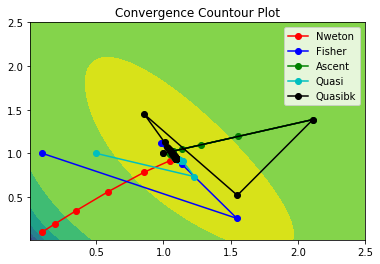

<Figure size 432x288 with 0 Axes>

In [64]:
#Create contour
x0 = np.linspace(0.01,2.5,100)
y0 = np.linspace(0.01,2.5,100)
X,Y = np.meshgrid(x0,y0)
Zmesh = np.zeros((X.shape[0],Y.shape[0]))

for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        a0 = X[i,j]; a1 = Y[i,j]
        a = np.array([a0,a1])
        Zmesh[i,j]=l(a,beta,N)[0]
plt.contourf(X,Y,Zmesh) 
plt.plot(newta,newtb,'ro-')
plt.plot(fisha,fishb,'bo-')
plt.plot(ascenta,ascentb,'go-')
plt.plot(quasia,quasib,'co-')
plt.plot(backta,backtb,'ko-')
plt.title('Convergence Countour Plot')
plt.legend(['Nweton','Fisher','Ascent','Quasi','Quasibk'])
plt.figure()
print()
